In [1]:
!pip install torch torchvision
!pip install pkbar

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import pkbar

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/21_DL/sketches/*.jpg'
file_path2 =  '/content/drive/MyDrive/Colab Notebooks/21_DL/photos/*.jpg'
file_list = glob(file_path)
file_list2 = glob(file_path2)

In [5]:
data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
target_dict = {'sketches':0}
file_list.sort()
for path in file_list:
    
    data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장
    
    path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
    print(path_list)
    
    data_dict['image_name'].append(path_list[-1])      
    data_dict['class'].append(path_list[-2])
    data_dict['target'].append(target_dict[path_list[-2]])
train_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', train_df)

train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/21_DL/sketches/train.csv", mode='w')

['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-005-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-006-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-007-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-008-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-009-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-010-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-011-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-012-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-013-01-sz1.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'sketches', 'F2-014-01-sz1.jpg']
['', 'content', 'drive', 'MyDr

In [6]:
data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
target_dict = {'photos':0}
file_list2.sort()
for path in file_list2:
    
    data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장
    
    path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
    print(path_list)
    
    data_dict['image_name'].append(path_list[-1])      
    data_dict['class'].append(path_list[-2])
    data_dict['target'].append(target_dict[path_list[-2]])
train_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', train_df)

train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/21_DL/photos/train.csv", mode='w')

['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-005-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-006-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-007-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-008-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-009-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-010-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-011-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-012-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-013-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-014-01.jpg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '21_DL', 'photos', 'f-015-01.jpg']
['', 'cont

In [7]:
from sklearn.model_selection import train_test_split

def get_df():
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21_DL/sketches/train.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21_DL/photos/train.csv')

    df_train, df_test = train_test_split(df, test_size=0.05, shuffle=False, random_state=2359)
    df_train, df_val = train_test_split(df_train, test_size=0.05, shuffle=False, random_state=2359)

    df_train2, df_test2 = train_test_split(df2, test_size=0.05, shuffle=False, random_state=2359)
    df_train2, df_val2 = train_test_split(df_train2, test_size=0.05, shuffle=False, random_state=2359)
    
    return df_train, df_val, df_test, df_train2, df_val2, df_test2

In [8]:
df_train, df_val, df_test, df_train2, df_val2, df_test2 = get_df()
print(len(df_train), len(df_val), len(df_test))
print(len(df_train2), len(df_val2), len(df_test2))

169 9 10
169 9 10


In [9]:
class Classification_Dataset(Dataset):
    def __init__(self, csv, mode, transform=None):
        self.csv = csv.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return self.csv.shape[0]

    def __getitem__(self, index):   
        row = self.csv.iloc[index]                       
        image = Image.open(row.file_path).convert('RGB')
        target = torch.tensor(self.csv.iloc[index].target).long()
        
        if self.transform:
            image = self.transform(image)

        return image, target

In [10]:
from torchvision import transforms

def get_transforms(image_size):

    transforms_train = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(256),
                                       transforms.ToTensor()
                                       ])
    
    transforms_val = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(256),
                                      transforms.ToTensor()
                                      ])
    
    return transforms_train, transforms_val

In [11]:
transforms_train, transforms_val = get_transforms(256)

In [12]:
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms_train)
dataset_val = Classification_Dataset(df_val, 'valid', transform=transforms_val)
dataset_train2 = Classification_Dataset(df_train2, 'train', transform=transforms_train)
dataset_val2 = Classification_Dataset(df_val2, 'valid', transform=transforms_val)

In [39]:
from torch.utils.data import RandomSampler
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=64, sampler=RandomSampler(dataset_train), num_workers=0)
valid_loader = torch.utils.data.DataLoader(dataset_val, batch_size=64, num_workers=0)

train_loader2 = torch.utils.data.DataLoader(dataset_train2, batch_size=64, sampler=RandomSampler(dataset_train2), num_workers=0)
valid_loader2 = torch.utils.data.DataLoader(dataset_val2, batch_size=64, num_workers=0)

In [16]:
def conv_block(in_dim, out_dim, act_fn):
  model = nn.Sequential(
      nn.Conv2d(in_dim, out_dim, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(out_dim),
      act_fn,
  )
  return model

def conv_trans_block(in_dim, out_dim, act_fn):
  model = nn.Sequential(
      nn.ConvTranspose2d(in_dim, out_dim, kernel_size=3, stride=2, padding=1, output_padding=1),
      nn.BatchNorm2d(out_dim),
      act_fn,
  )
  return model

def maxpool():
  pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
  return pool


def conv_block_2(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        conv_block(in_dim,out_dim,act_fn),
        nn.Conv2d(out_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
    )
    return model   

In [46]:
class UnetGenerator(nn.Module):
    def __init__(self,in_dim,out_dim,num_filter):
        super(UnetGenerator,self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_filter = num_filter
        act_fn = nn.ReLU()

        print("\n------Initiating U-Net------\n")

        self.down_1 = conv_block_2(self.in_dim,self.num_filter,act_fn)
        self.pool_1 = maxpool()
        self.down_2 = conv_block_2(self.num_filter*1,self.num_filter*2,act_fn)
        self.pool_2 = maxpool()
        self.down_3 = conv_block_2(self.num_filter*2,self.num_filter*4,act_fn)
        self.pool_3 = maxpool()
        self.down_4 = conv_block_2(self.num_filter*4,self.num_filter*8,act_fn)
        self.pool_4 = maxpool()
        self.down_5 = conv_block_2(self.num_filter*8,self.num_filter*16,act_fn)
        self.pool_5 = maxpool()

        self.bridge = conv_block_2(self.num_filter*16,self.num_filter*32,act_fn)

        self.trans_1 = conv_trans_block(self.num_filter*32,self.num_filter*16,act_fn)
        self.up_1 = conv_block(self.num_filter*32,self.num_filter*16,act_fn)
        self.trans_2 = conv_trans_block(self.num_filter*16,self.num_filter*8,act_fn)
        self.up_2 = conv_block(self.num_filter*16,self.num_filter*8,act_fn)
        self.trans_3 = conv_trans_block(self.num_filter*8,self.num_filter*4,act_fn)
        self.up_3 = conv_block(self.num_filter*8,self.num_filter*4,act_fn)
        self.trans_4 = conv_trans_block(self.num_filter*4,self.num_filter*2,act_fn)
        self.up_4 = conv_block(self.num_filter*4,self.num_filter*2,act_fn)
        self.trans_5 = conv_trans_block(self.num_filter*2,self.num_filter*1,act_fn)
        self.up_5 = conv_block(self.num_filter*2,self.num_filter*1,act_fn)

        self.out = nn.Sequential(
            nn.Conv2d(self.num_filter,self.out_dim,3,1,1),
            nn.Tanh(),
        )

    def forward(self,input):
        down_1 = self.down_1(input)
        pool_1 = self.pool_1(down_1)
        down_2 = self.down_2(pool_1)
        pool_2 = self.pool_2(down_2)
        down_3 = self.down_3(pool_2)
        pool_3 = self.pool_3(down_3)
        down_4 = self.down_4(pool_3)
        pool_4 = self.pool_4(down_4)
        down_5 = self.down_5(pool_4)
        pool_5 = self.pool_5(down_5)

        bridge = self.bridge(pool_5)

        trans_1 = self.trans_1(bridge)
        concat_1 = torch.cat([trans_1,down_5],dim=1)
        up_1 = self.up_1(concat_1)
        trans_2 = self.trans_2(up_1)
        concat_2 = torch.cat([trans_2,down_4],dim=1)
        up_2 = self.up_2(concat_2)
        trans_3 = self.trans_3(up_2)
        concat_3 = torch.cat([trans_3,down_3],dim=1)
        up_3 = self.up_3(concat_3)
        trans_4 = self.trans_4(up_3)
        concat_4 = torch.cat([trans_4,down_2],dim=1)
        up_4 = self.up_4(concat_4)
        trans_5 = self.trans_5(up_4)
        concat_5 = torch.cat([trans_5,down_1],dim=1)
        up_5 = self.up_5(concat_5)
        out = self.out(up_5)
        return out

In [38]:
batch_size = 64
in_dim = 3
out_dim = 3
num_filters = 16
num_epoch=50

In [47]:
model = UnetGenerator(in_dim=in_dim,out_dim=out_dim,num_filter=num_filters)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_g = model.to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(num_epoch):
    print("Epoch {}/{}".format(epoch+1, num_epoch))
    progress = pkbar.Kbar(target=len(train_loader), width=25)
    for i, ((data, data2), (target, target2)) in enumerate(zip(train_loader, train_loader2)):
        optimizer.zero_grad()
        data=data.to(device)
        output = model_g(data)
        target=target.to(device)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        progress.update(i, values=[("loss", loss.item())])
    progress.add(1)


------Initiating U-Net------

Epoch 1/50
3/3 [=========================] - 6s 2s/step - loss: 0.2872
Epoch 2/50
3/3 [=========================] - 6s 2s/step - loss: 0.1613
Epoch 3/50
3/3 [=========================] - 6s 2s/step - loss: 0.1026
Epoch 4/50
3/3 [=========================] - 6s 2s/step - loss: 0.0721
Epoch 5/50
3/3 [=========================] - 6s 2s/step - loss: 0.0663
Epoch 6/50
3/3 [=========================] - 6s 2s/step - loss: 0.0601
Epoch 7/50
3/3 [=========================] - 6s 2s/step - loss: 0.0586
Epoch 8/50
3/3 [=========================] - 6s 2s/step - loss: 0.0555
Epoch 9/50
3/3 [=========================] - 6s 2s/step - loss: 0.0530
Epoch 10/50
3/3 [=========================] - 6s 2s/step - loss: 0.0479
Epoch 11/50
3/3 [=========================] - 6s 2s/step - loss: 0.0428
Epoch 12/50
3/3 [=========================] - 6s 2s/step - loss: 0.0425
Epoch 13/50
3/3 [=========================] - 6s 2s/step - loss: 0.0417
Epoch 14/50
3/3 [=========================

In [48]:
from torchsummary import summary
summary(model, (3, 256, 256), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             448
       BatchNorm2d-2         [-1, 16, 256, 256]              32
              ReLU-3         [-1, 16, 256, 256]               0
              ReLU-4         [-1, 16, 256, 256]               0
              ReLU-5         [-1, 16, 256, 256]               0
              ReLU-6         [-1, 16, 256, 256]               0
              ReLU-7         [-1, 16, 256, 256]               0
              ReLU-8         [-1, 16, 256, 256]               0
              ReLU-9         [-1, 16, 256, 256]               0
             ReLU-10         [-1, 16, 256, 256]               0
             ReLU-11         [-1, 16, 256, 256]               0
             ReLU-12         [-1, 16, 256, 256]               0
             ReLU-13         [-1, 16, 256, 256]               0
             ReLU-14         [-1, 16, 2

torch.Size([41, 3, 256, 256])


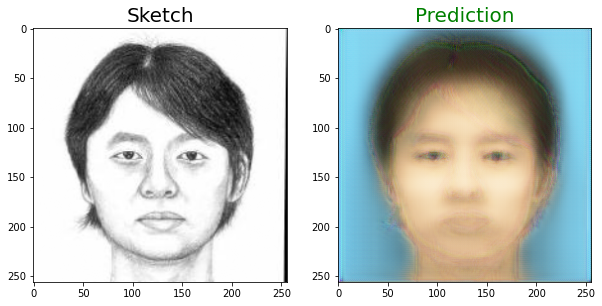

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


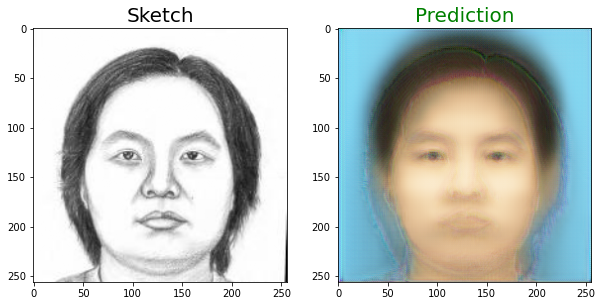

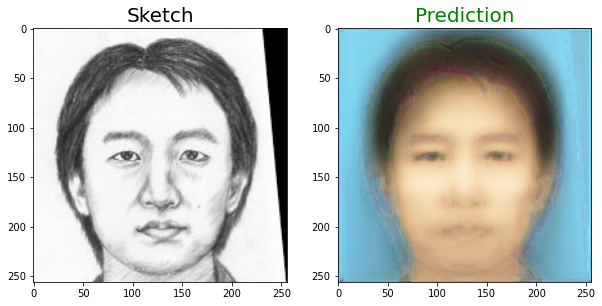

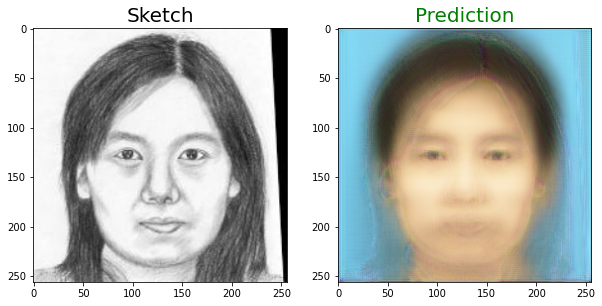

In [49]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(4):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('Sketch', color='k', fontsize=20)
    plt.imshow(data[i].permute(1, 2, 0).cpu().numpy())
    plt.subplot(1,2,2)
    plt.title('Prediction', color='g', fontsize=20)
    plt.imshow(out_img[i].permute(1, 2, 0).numpy())
    plt.show()

In [50]:
from skimage.metrics import peak_signal_noise_ratio
max=0
for i in range(len(target)):
  psnr=peak_signal_noise_ratio(target[i].cpu().numpy(), out_img[i].cpu().numpy())
  if max<psnr:
    max=psnr
print("PSNR : ", max)

PSNR :  18.07314379501802


In [51]:
with torch.no_grad():
    for j,[image,label] in enumerate(valid_loader):
        image = image.to(device)
        output = model_g(image)
        
    if j % 10 == 0:
        print(loss)        

tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>)


torch.Size([9, 3, 256, 256])


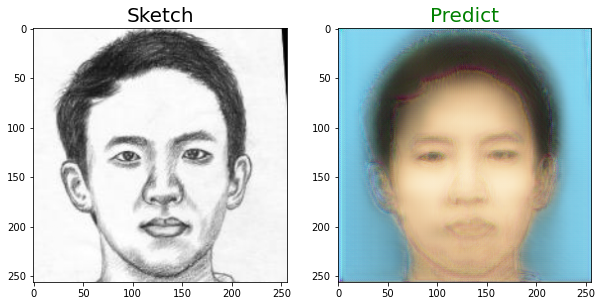

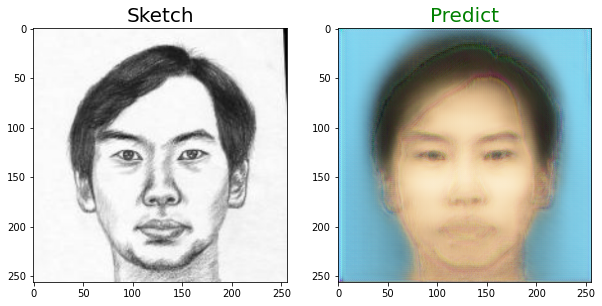

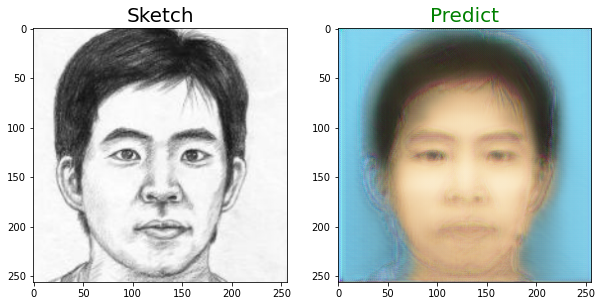

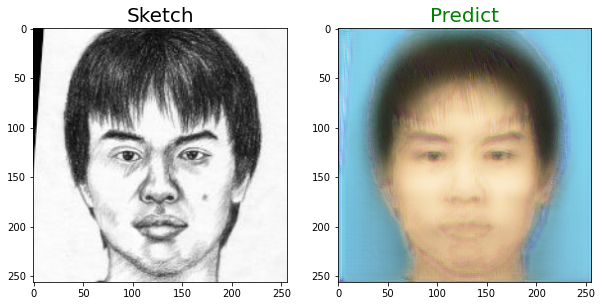

In [55]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(0,4):
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.title('Sketch', color='k', fontsize=20)
    plt.imshow(image[i].permute(1, 2, 0).cpu().numpy())
    plt.subplot(1,2,2)
    plt.title('Predict', color='g', fontsize=20)
    plt.imshow(out_img[i].permute(1, 2, 0).numpy())
    plt.show()

In [53]:
max=0
for i in range(len(out_img)):
  psnr=peak_signal_noise_ratio(target[i].cpu().numpy(), out_img[i].cpu().numpy())
  if max<psnr:
    max=psnr
print("PSNR : ", max)

PSNR :  17.587906672021845
